• Since the generalization error cannot be estimated based on the training error, simply min-imizing the training error will not necessarily mean a reduction in the generalization error.Machine learning models need to be careful to safeguard against overfitting so as to mini-mize the generalization error.

• A validation set can be used for model selection, provided that it is not used too liberally.

• Underfitting means that a model is not able to reduce the training error. When training erroris much lower than validation error, there is overfitting.

• We should choose an appropriately complex model and avoid using insufficient trainingsamples.

* ##### While L2-regularizedlinear models constitute the classic ridge regression algorithm, L1-regularized linear regression isa similarly fundamental model in statistics, which is popularly known as lasso regression.

* ##### One reason to work with the L2 norm is that it places an outsize penalty on large components of theweight vector. This biases our learning algorithm towards models that distribute weight evenly across a larger number of features. In practice, this might make them more robust to measure-ment error in a single variable. By contrast, L1 penalties lead to models that concentrate weightson a small set of features by clearing the other weights to zero. This is called feature selection,which may be desirable for other reasons.

In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style

import torch 
from torch.optim import SGD

In [51]:
def make_regression_data(num_samples, dimension):
    w = np.random.normal(1, 0.1, (dimension))
    b = np.random.normal(3, 0.1, (1))
    x = np.random.normal(0, 0.1, (num_samples, dimension))
    y = x@w + b # shape is (num_samples)
    noise = np.random.normal(0, 1, (num_samples))
    y = y + 3*noise
    return x, y

In [52]:
# we are takoing just 20 training examples and 1100 test examples to show our overfitting model performance
num_samples = 1200
dimension = 200
x, y  = make_regression_data(num_samples, dimension)  # we will use high dimensionality case and less examples to show the case 
#of overfitting and how regurlarization makes it better
indices = np.random.permutation(num_samples)
data_x, data_y = x[indices], y[indices]
train_x, test_x, train_y, test_y = data_x[:100, :], data_x[100:, :], data_y[:100], data_y[100:]

In [53]:
def init_params(dimension):
    w = torch.randn((dimension), requires_grad=True)
    b = torch.randn((1), requires_grad=True)
    return [w, b]

def forward(x, params):
    # x (num_samples, dimension)
    return torch.matmul(x, params[0]) + params[1]

def loss_fn(y, yhat, params, lambd=0):
    # lambd is the regularization parameter
    return (0.5/y.shape[0])*(torch.sum(torch.square(y-yhat))) + (lambd/2)*(torch.matmul(params[0], params[0]))

In [54]:
def train(train_x, train_y, test_x, test_y, num_epochs, lr, params, optimizer, loss_fn, batch_size, lambd=0):
    w = params[0]
    b = params[1]
    training_losses =  []
    testing_losses = []
    data_x = torch.tensor(train_x, dtype=torch.float32)
    data_y = torch.tensor(train_y, dtype=torch.float32)
   # print(data_x.shape, data_y.shape)#########
    test_x1 = torch.tensor(test_x, dtype=torch.float32) 
    test_y1 = torch.tensor(test_y, dtype=torch.float32)
    #############################
    dataset = torch.concat((data_x, torch.unsqueeze(data_y, 1)), axis=1)
    for epoch in range(num_epochs):
        training_losses.append(loss_fn(data_y, forward(data_x, params), params, lambd).item()) # this step won't be affective when 
        #the dataset is larger, we can instead do the sum of all the bacthes and take their averages    
        testing_losses.append(loss_fn(test_y1, forward(test_x1, params), params, lambd).item())
        if epoch%(num_epochs/10)==0:
            print(f'epoch {epoch + 1}, training_loss : {float(training_losses[-1]):f}, testing_losses : {float(testing_losses[-1]):f}')
        #total_loss  =0
        #batches_processed = 0
        for batch in  torch.utils.data.DataLoader(dataset , batch_size=batch_size):
            # remember batch will be a tensor of (batch_size, features+1) 
            current_loss = loss_fn(batch[:, -1], forward(batch[:, :-1], params), params, lambd)
            #total_loss+= current_loss.item()
            
            optimizer.zero_grad()
            current_loss.backward()
            optimizer.step()
    return training_losses, testing_losses

In [55]:
num_features = 200
num_epochs = 1000
batch_size = 5

lr =1e-3
params1 = init_params(num_features)
params2 = init_params(num_features)
lambd1, lambd2 = 0, 4e-0 

optimizer1 = SGD(params=params1, lr=lr)
optimizer2 = SGD(params=params2, lr=lr)


epoch 1, training_loss : 9.253683, testing_losses : 9.316120
epoch 101, training_loss : 6.308711, testing_losses : 6.455814
epoch 201, training_loss : 5.823218, testing_losses : 6.315054
epoch 301, training_loss : 5.422124, testing_losses : 6.271610
epoch 401, training_loss : 5.060044, testing_losses : 6.244050
epoch 501, training_loss : 4.731788, testing_losses : 6.225408
epoch 601, training_loss : 4.433414, testing_losses : 6.214017
epoch 701, training_loss : 4.161514, testing_losses : 6.208919
epoch 801, training_loss : 3.913129, testing_losses : 6.209337
epoch 901, training_loss : 3.685683, testing_losses : 6.214600


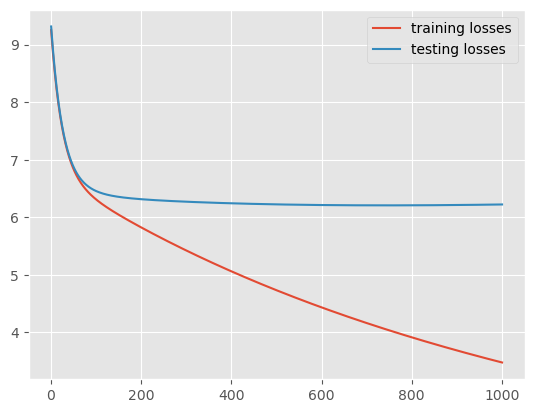

In [56]:
# model 1 without regularization 
training_losses1, testing_losses1 = train(train_x,train_y,test_x,test_y,num_epochs,lr,params1,  optimizer1, loss_fn, 
                                          batch_size,lambd=lambd1) # unregularized model
style.use('ggplot')
plt.plot(range(1, num_epochs+1), training_losses1)
plt.plot(range(1, num_epochs+1), testing_losses1)
plt.legend(['training losses', 'testing losses'])
plt.show()

epoch 1, training_loss : 476.845367, testing_losses : 476.174744
epoch 101, training_loss : 5.916853, testing_losses : 5.642749
epoch 201, training_loss : 5.850300, testing_losses : 5.545005
epoch 301, training_loss : 5.849126, testing_losses : 5.539649
epoch 401, training_loss : 5.849114, testing_losses : 5.539067
epoch 501, training_loss : 5.849114, testing_losses : 5.538991
epoch 601, training_loss : 5.849115, testing_losses : 5.538980
epoch 701, training_loss : 5.849114, testing_losses : 5.538978
epoch 801, training_loss : 5.849114, testing_losses : 5.538978
epoch 901, training_loss : 5.849114, testing_losses : 5.538978


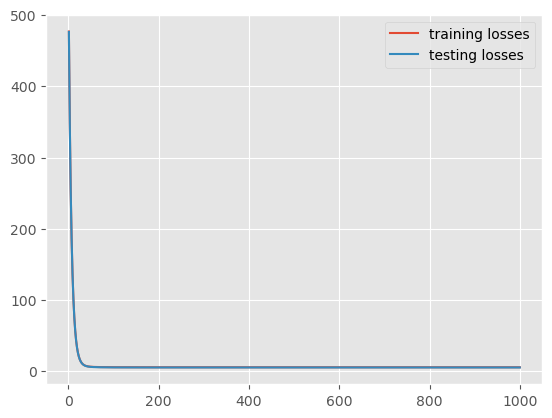

In [57]:
# model 2 with regularization
training_losses2, testing_losses2 = train(train_x,train_y,test_x,test_y,num_epochs,lr,params2,  optimizer2, loss_fn, 
                                          batch_size,lambd=lambd2) # regularized model
style.use('ggplot')
plt.plot(range(1, num_epochs+1), training_losses2)
plt.plot(range(1, num_epochs+1), testing_losses2)
plt.legend(['training losses', 'testing losses'])
plt.show()

* #### Classic example of overfitting and regularizing helping to avoid it
* #### Naively applied, linear models do not takeinto account interactions among features.
* #### In traditional texts, this fundamental tension between generalizability and flexibility is describedas the bias-variance tradeoff. Linear models have high bias: they can only represent a small classof functions. However, these models have low variance: they give similar results across differentrandom samples of the data.Deep neural networks inhabit the opposite end of the bias-variance spectrum. Unlike linear mod-els, neural networks are not confined to looking at each feature individually. They can learn in-teractions among groups of features. For example, they might infer that “Nigeria” and “WesternUnion” appearing together in an email indicates spam but that separately they do not.